# Bank Customer Churn

<img src="ban-churn.png"></img>

<img src="ban-churn_1.jpg"></img>

Customer Churn, also known as customer attrition, customer turnover or customer defection is a degree of customer inactivity or disengagement that is observed by the bank over a certain amount of time.


Banks, insurance companies, streaming services companies and telcom service companies often use customer churn analysis and customer churn rates as one of their key business metrics because the cost of retaining existing customers is far less than acquiring a new one.


For instance, we have a client ‘ABC Bank’. The bank has noticed an increased number of customers leaving the bank. To tackle this alarming situation, the bank has decided to collect the data of the past 6 months from the year 2016. 10,000 customers are selected randomly among three countries - <b>France, Germany , Spain</b>. The bank wanted to understand and get insights about customer churning so that the bank can upgrade or adapt new policies.


This analysis focuses on the behavior of bank customers who are more likely to leave the bank (i.e. close their bank account). I want to find out the most striking behaviors of customers through the Exploratory Data Analysis.


<b>Mr. Aakash</b>, founder of <b>Jovian ML</b> has provided a wondeful six-week course on performing data analysis and visualization using Python. The course taught me a lot about the practical aspects of Data Analysis, handling missing values and using Python and their libraries(Numpy, MatplotLib, Seaborn and Pandas) to perform Data Analysis and Visualization of <b>COVID-19<b> and <b>Stack Overflow</b> survey data.

In [1]:
project_name = "customer-churn-analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "adityaanilpawar281198/customer-churn-analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'

## Data Preparation and Cleaning

In [5]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Loading the dataset of ABC bank

train = pd.read_csv("Data/Churn_Data.csv")
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The dataset has the following columns which will not have any impact on the customer leaving the bank:-

- RowNumber
- CustomerId 
- Surname


The Categorical variables are:-

- Geography
- Gender
- NumOfProducts
- HasCrCard
- IsActiveMember 

The Numerical variables are:-

- CreditScore 
- Age
- Tenure
- Balance
- EstimantedSalary 

In [7]:
train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# Checking for null values

train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Checking for duplicate customer ID's

train['CustomerId'].is_unique

True

In [11]:
# Getting the number of rows and columns

train.shape

(10000, 14)

In [12]:
# Renaming the 'Geography' column

train.rename({"Geography":"Country"}, axis="columns", inplace=True) 
train

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
import jovian

In [17]:
jovian.commit(outputs = ['Churn_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adityaanilpawar281198/customer-churn-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "Churn_Data.csv" (not found)


[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'

## Exploratory Analysis and Visualization

Before I ask questions about the customer churning that happened in banks, I would like to explore the number of countries, the number Of products, how many customers have credit card and other fields in the data set.

In [21]:
# Number of countries in which customers have exited the bank

print(f"Customers have exited the bank from {train.Country.nunique()} countries.")

Customers have exited the bank from 3 countries.


In [166]:
#Calculating the mean of the Estimated Salary of customers in all the three countries

a = np.array(train.EstimatedSalary)
np.mean(a)

100090.239881

The estimated salary of the customers in all the 3 countries is around 100090/-

In [31]:
countries = train.Country.unique()

In [32]:
totalExited = len(train.loc[train.Exited == 1])

In [35]:
def findCountryWiseChurnRatio(countryName,df):
    
    totalPeople= len(df.loc[df.Country == countryName])
    totalExitedPerCountry = len(df.loc[(df.Exited == 1) & (df.Country == countryName)])
    return((totalExitedPerCountry/totalPeople)*100)

In [36]:
churnPercentageByCountry =  {x:np.round(findCountryWiseChurnRatio(x,train)) for x in countries}

In [37]:
churnPercentageByCountry

{'France': 16.0, 'Spain': 17.0, 'Germany': 32.0}

The above computations show the percentage of customers in each of the three countries who have exited from the banks 

### Gender

Let us know the gender of men who were customers and who are customers of 'ABC' bank.

In [22]:
gender = pd.value_counts(train.Gender)
gender

Male      5457
Female    4543
Name: Gender, dtype: int64

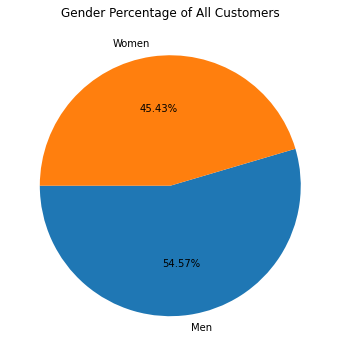

In [23]:
plt.figure(figsize=(12,6))
plt.title('Gender Percentage of All Customers')
plt.pie(gender, labels=['Men', 'Women'], autopct='%1.2f%%', startangle=180);

From the pie chart, we can see that there are 54.47 % of men and 45.43 % of women who are customers of 'ABC Bank'.

### Estimated Salary

Text(0.5, 1.0, 'Estimated Salary with Age')

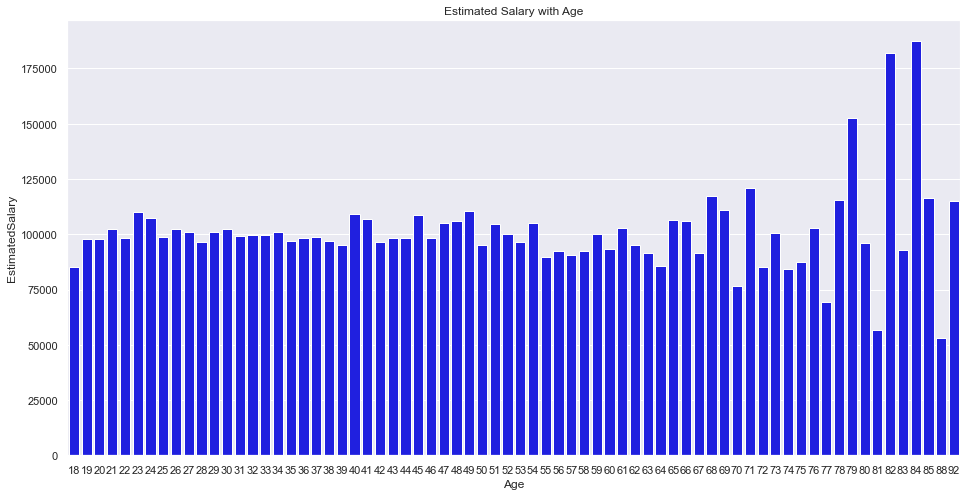

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(x= 'Age',y = 'EstimatedSalary',data = train,color='blue',ci=None)
plt.title('Estimated Salary with Age')

From the bar plot, we see that after the age of 81, there is a rise in salary which goes above 175000. That may be because customers are generating income from blooming sources like businesses and investments.

### Geography and Gender Distribution

Text(38.54343723958334, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

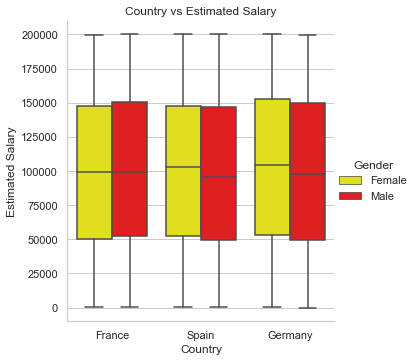

In [72]:
# Looking at Geography and Gender Distribution against Estimated Salary

plt.figure(figsize=(20,20))
sns.catplot(x="Country", y="EstimatedSalary", hue="Gender", kind="box", palette=['Yellow','Red'], data=train)
plt.title("Country vs Estimated Salary")
plt.xlabel("Country")
plt.ylabel("Estimated Salary")

From the visualization, we can see that the male customer estimated salary is higher than females in France and Spain, however in Germany female customer's estimated salary is higher.

### Age

Text(0.5, 1.0, 'Age Wise Balance Distribution')

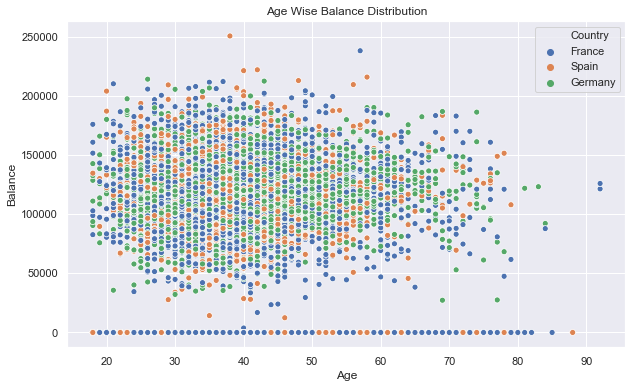

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Balance",hue = 'Country',data=train,)
plt.title('Age Wise Balance Distribution')

Here we are plotting scatter plot which shows “Balance of customer” according to “Age of customer”. But after plotting, we can understand their isn't any correlation between Balance and Age in customer because points are scattered all over the graph. 

We can observe one interesting fact that France and Germany has Accounts with near to 0 balance amount. This is really ironic because Germany has maximum number of churned customers. So this observation invalidate the hypothesis that customers with 0 account balance are most likely to leave the bank.

### Country Wise Balance Distribution

In [42]:
x1 = list(train[train.Country == 'France']['Balance'])
x2 = list(train[train.Country == 'Germany']['Balance'])
x3 = list(train[train.Country == 'Spain']['Balance'])

Text(0.5, 1.0, 'Country Wise Balance Distribution')

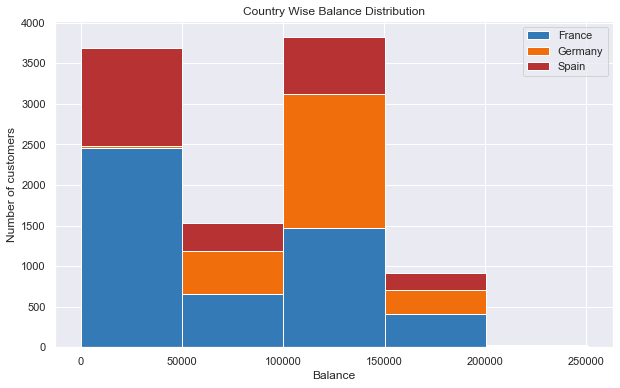

In [43]:
sns.set()
plt.figure(figsize=(10,6))
plt.hist([x1,x2,x3],bins = 5,stacked=True,color = ['#337ab7','#f16e0c','#b73333'],)
plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.legend(['France','Germany','Spain'])
plt.title('Country Wise Balance Distribution')

The plot above shows the Balance of customers of different countries. 

In the first bar you notice, It contains the customers who have a balance between (0 - 50000). France has the highest number of customers and then comes Spain and Germany has very less customers in this segment. 

In the third bar, you notice Germany (100000 - 150000) has the maximum number of customers. 

Based on the above plot we can conclude that the accounts from Germany are very rich as compared to the other two countries. But if you see Plot 1 then you’ll understand the maximum number of customers leaving the bank are from Germany.

### Inferring who left the bank by taking age under consideration

In [24]:
def distribution(category):
    NonExited=train[train.Exited == 0][category]
    Exited=train[train.Exited == 1][category]
    plt.figure(figsize=(10,6))
    sns.set()
    plt.hist(NonExited,alpha=0.75,bins = 100,label = 'Not Exited',color = "blue",weights=np.ones(len(NonExited)) / len(NonExited))
    plt.hist(Exited,alpha=0.70,bins = 100,label = 'Exited',color = "red",weights=np.ones(len(Exited)) / len(Exited))
    plt.xlabel(category)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.title('{} Distribution'.format(category))
    plt.show()

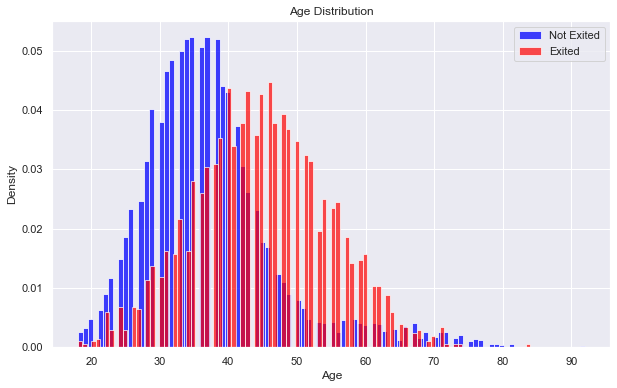

In [25]:
distribution('Age')

The above histogram shows the age distribution according to the customer who stayed and left the bank. Here, we observe a very interesting trend:

Young adult customers(customers from 20-40) have not left the bank but customers after the age of 40 have mostly left the bank. The reason for this may be that other competitor banks offer better incentives(as the older customers have much experience with the bank and its services than the younger ones).

### Inferring who left the bank by taking age under consideration.

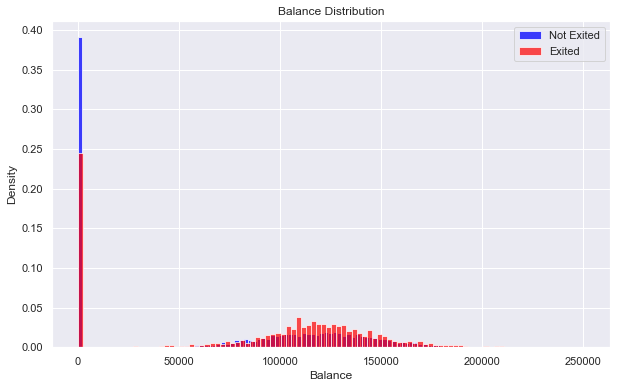

In [26]:
distribution('Balance')

From the above visualization, we can see that the distribution of balance for the customers who left is normal. Also, for the customers with 0 bank balance there is a hike in the density- approximately 24% for the customers who left and 39% for the customers who stayed.

### Inferring who left the bank by taking Credit Score of customer under consideration.

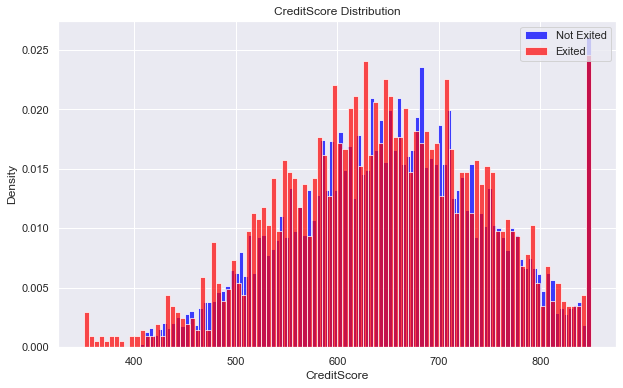

In [44]:
distribution('CreditScore')

Here, we can observer that more customers with a high credit score are leaving the bank than the customers with a low credit score. One reason behind this may be that ABC Bank was not offering good services or premium services to their trustworthy candidates. 

In [169]:
import jovian

In [170]:
jovian.commit(outputs = ['Churn_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adityaanilpawar281198/customer-churn-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...


[jovian] Error: Ignoring "Churn_Data.csv" (not found)


[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'

## Asking and Answering Questions

We've already gained several insights and information about their shares in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

### Q.1) Which country has the maximum number of customers churned?

In [45]:
sns.set_style("whitegrid")

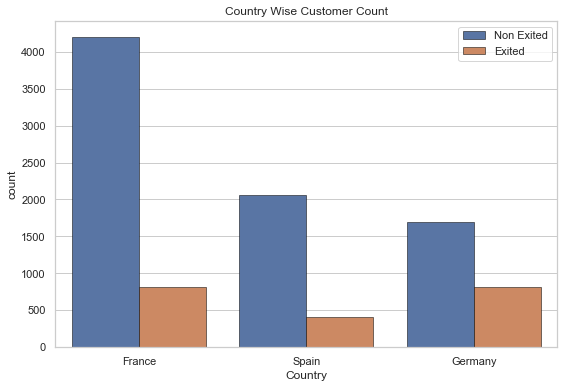

In [47]:
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=train,
                 x = 'Country',
                 hue = 'Exited',
                 edgecolor=(0,0,0),
                 linewidth=0.5)
plt.title('Country Wise Customer Count')
plt.legend(['Non Exited','Exited'])

Above countplot shows the count of customers present in each country and customer churned from the same country. Here we can notice France and Germany has maximum number of customers as compared to Spain. <b>But the maximum number of customers are churned from Germany.</b>

### Q.2) How many customers are active members of ABC bank?

In [58]:
selected_columns = train[train.IsActiveMember == 1].count()
selected_columns.IsActiveMember

5151

We can see that there are a total of 5151 active members of ABC bank.

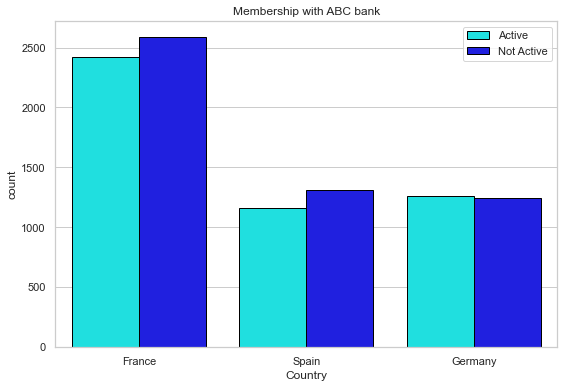

In [62]:
plt.figure(figsize=(9, 6))
ax=sns.countplot(data=train,
                 x = 'Country',
                 palette=["cyan", "blue"],
                 hue = 'IsActiveMember',
                 edgecolor=(0,0,0),
                 linewidth=1.0)
plt.title('Membership with ABC bank')
plt.legend(['Active','Not Active'])

From the countplot, we can see that there are approx. 2400 people who are active members from France, 1200 from Spain and 1300 from Germany. So, the total becomes 2400 + 1300 + 1400 = 5100 which is approximately correct as compared to the above estimated number. 

### Q.3)How many customers have a credit card?

In [97]:
credit = pd.value_counts(train.HasCrCard)
credit

1    7055
0    2945
Name: HasCrCard, dtype: int64

From the above output, we can infer that there are a total of 7055 customers from the three countries(France, Spain and Germany) who have a credit card.

### Q.3) A) How many female members have a credit card?

In [98]:
credit_gender = train.groupby('Gender')['HasCrCard'].sum()
credit_gender

Gender
Female    3192
Male      3863
Name: HasCrCard, dtype: int64

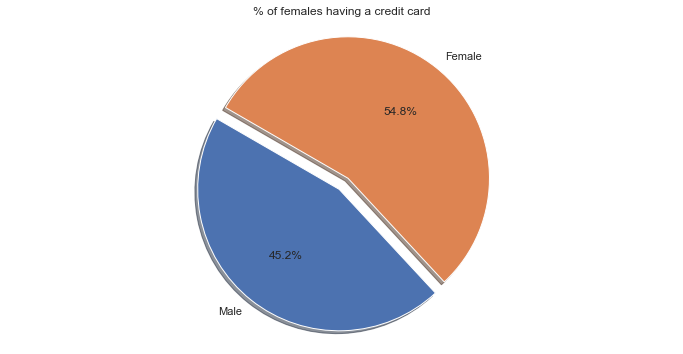

In [99]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(12,6))
plt.title('% of females having a credit card')
plt.pie(credit_gender, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the pie graph, we can see that there are 54.8% of female candidates who are having credit cards.

### Q.4) How many customers exited from the bank?

In [102]:
status = pd.value_counts(train.Exited)
status

0    7963
1    2037
Name: Exited, dtype: int64

From the above computation, we can infer that there were a total of 2037 people who exited from the bank. From this, it can be inferred that the condition of customer churning in ABC bank was not in much risk

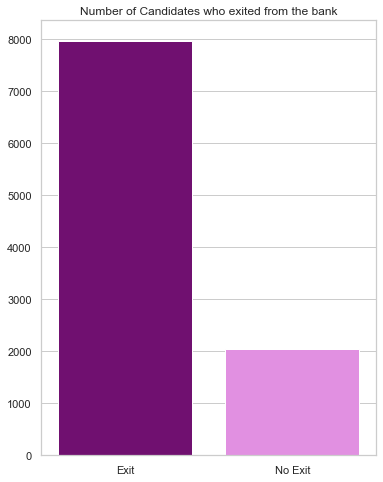

In [130]:
plt.figure(figsize=(6,8))
plt.title('Number of Candidates who exited from the bank')
sns.barplot(x=['Exit', 'No Exit'], y=status.values, palette = ['purple','violet']);

The above bar plot also shows that, there are approximately slightly less than 8000 members in the bank and remaining customers have left the bank.

### Q.5) Which country had the highest number of products?

In [131]:
products = train.groupby('Country')['NumOfProducts'].count().sort_values(ascending=False)
products

Country
France     5014
Germany    2509
Spain      2477
Name: NumOfProducts, dtype: int64

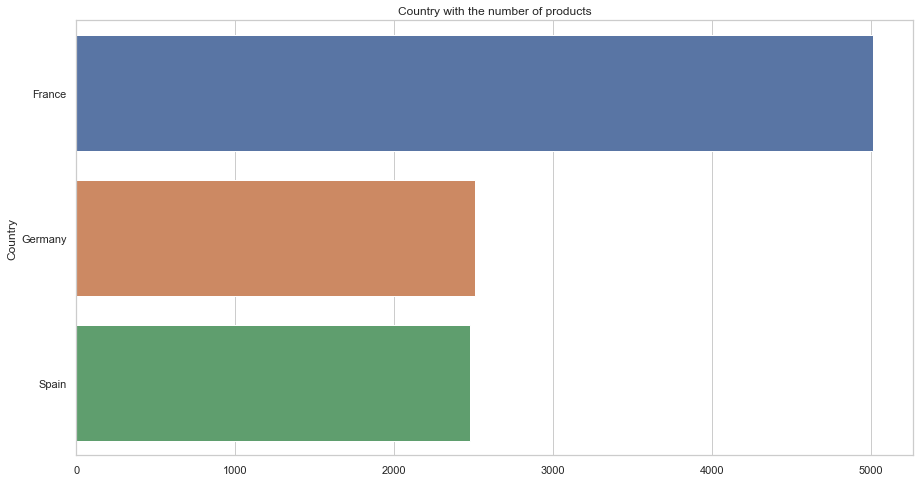

In [136]:
plt.figure(figsize=(15,8))
plt.title('Country with the number of products')
plt.ylabel('Country')
sns.barplot( x=products.values, y=products.index);

We can see from the computations and visualization that France has a relatively high number of products as compared to Germany and Spain. 

### Q.6) List the top 20 customers who have the highest and least tenure. 

In [148]:
heads = train.groupby(['CustomerId'])['Tenure'].max().head(20)

In [149]:
heads

CustomerId
15565701     9
15565706     1
15565714     1
15565779     6
15565796    10
15565806     9
15565878     3
15565879     9
15565891     8
15565996     8
15566030     5
15566091     4
15566111     9
15566139     5
15566156     0
15566211     1
15566251     5
15566253     9
15566269     5
15566292     1
Name: Tenure, dtype: int64

From the above computation, we can see that the maximum tenure is 10 years and minimum tenure is 0 years.

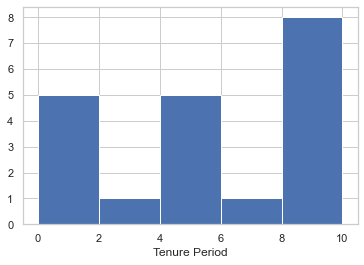

In [155]:
plt.xlabel('Tenure Period')
plt.hist(heads, bins=5);

In [171]:
import jovian

In [172]:
jovian.commit(outputs = ['Data/Churn_Data.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adityaanilpawar281198/customer-churn-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'

## Inferences and Conclusion

We gathered many interesting facts about the customer churning of Bank ABC from this analysis. Below is the summary of few of them :-

- From the bar plot of Estimated Salary vs Age, we came across a very interesting thing. Generally, it is observed that as age increases, a person’s salary increases. To check this assumption we had plotted the estimated salary with age. If we see the plot, we can observe that our assumption is wrong. But we can see in the bar plot that, at the age of 81 and 88, customer are having a very low salary as compared to the other age groups. So, from this, we can infer that age does not play a major role in the salary of a customer.


- We can infer that Germany has multiple banks which offer better incentives to the customers as compared to the ABC Bank. That's why a number of customers are moving out and opting for other banks. We don't have data of other banks so it’s better that we speculate.


- From the visualization of Geography and Gender distribution, we can infer that the male customer estimated salary is higher than females in France and Spain, however in Germany female customer's estimated salary is higher than the male counterpart.


- From the histogram visualization of Age, we have inferred that the age of customers is inversely proportional to the customers exiting the bank(More younger customers(20-40) stayed in the bank and elder ones(above 40) left the bank).


- Maximum number of customers from 'ABC Bank' are churned(or have exited) from Germany.


- There are less number of customers who have left the bank. 


- France has a relatively high number of products as compared to Germany and Spain.

In [1]:
import jovian

In [2]:
jovian.commit(outputs = ['Data/Churn_Data.csv','ban-churn.png','ban-churn_1.jpg'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adityaanilpawar281198/customer-churn-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'

## Future Work

There's a wealth of information to be discovered using the customer churning dataset of the bank and we've barely scratched the surface. Here are some ideas for further exploration:-

- Compare the results of the analysis done in 2016 with results in the recent years or in the future years.


- Try to find any other columns(apart from the ones) that can affect the customer churning.


- Prepare an analysis with visualization by taking Tenure period of the customers and analyze the role of Tenure in customer churning.

## References:-
    
1. https://blog.ekbana.com/customer-churn-prediction-4094fc24656b
2. https://www.tigeranalytics.com/blog/addressing-customer-churn-in-banking/
3. https://numpy.org/doc/stable/index.html
4. https://matplotlib.org/
5. https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn
6. https://jovian.ml/aakashns/python-pandas-data-analysis

## Vote of Thanks

At the end of this wonderful Course Project, I would like to thank Mr. Aakash N. S. and the whole Jovian ML Community for the whole six-week course on <b>Data Analysis with Python</b>. I had a very interesting experience learning the Python language and experimenting with the same just like Aakash said in the weekly Saturdays. 


All the lectures were very well-explained by Aakash and the assignments helped me to hone my coding skills even much more. The live course and the Jupyter Notebook from which Aakash used to explain were very useful for me. Sure, I struggled with many errors while coding the assignments and especially the course project, but Stack OverFlow and the <b>Jovian ML</b> community was very helpful to tackle the same too. Overall, in the process, I had fun. :)

Thanks a lot again for the course to the whole Jovian ML community. Cheers. :)

In [3]:
import jovian

In [5]:
jovian.commit(outputs = ['Data/Churn_Data.csv','ban-churn.png','ban-churn_1.jpg'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "adityaanilpawar281198/customer-churn-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ml/adityaanilpawar281198/customer-churn-analysis


'https://jovian.ml/adityaanilpawar281198/customer-churn-analysis'